<a href="https://colab.research.google.com/github/shehbaz1033/Indian-Housing-Prediction/blob/main/Data_Science_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv("/content/sample_data/IndianHouses.csv")
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [ ]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [ ]:
number_Of_Rows = len(data)
number_Of_Rows

1259

In [ ]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64


In [ ]:
Missing_Values_Columns = ['Bathroom', 'Parking', 'Per_Sqft']
for column in Missing_Values_Columns:
    average_value = data[column].mean()
    data[column].fillna(average_value, inplace=True)

In [ ]:
missing_values = data.isnull().sum()
missing_values

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

In [ ]:
String_Columns_Missing_Values = ['Furnishing', 'Type']
for column in String_Columns_Missing_Values:
  Most_Repetative_Value = data[column].mode()[0]
  data[column].fillna(Most_Repetative_Value, inplace = True)

In [ ]:
missing_values = data.isnull().sum()
missing_values

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [ ]:
duplicate_rows = data.duplicated()
duplicate_rows

0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Length: 1259, dtype: bool

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

#### Descriptive Statistics
Centrality and Spread Measures for Quantitive variables

- Measures of Central Tendency
    - Mean
    - Median
    - Mode
    - Percentiles
    - Quartiles

- Measures of Spread
    - Range
    - IQR
    - Variance
    - Standard Deviation

In [ ]:
data['Price'].describe().to_dict()

{'count': 1259.0,
 'mean': 21306703.733121525,
 'std': 25601154.525779802,
 'min': 1000000.0,
 '25%': 5700000.0,
 '50%': 14200000.0,
 '75%': 25500000.0,
 'max': 240000000.0}

Mean = 21M

Median = 14M


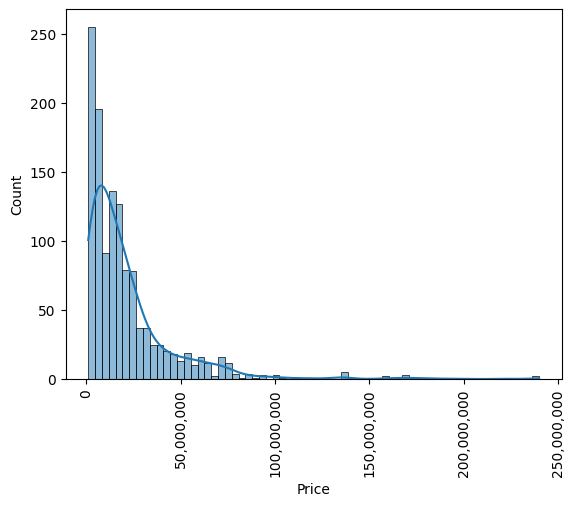

In [ ]:
sns.histplot(data, x='Price', kde=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x * 1)))
plt.xticks(rotation=90)
plt.show()

In [ ]:
data[data['Price']>100000000]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
57,8000.0,4,5.0,Semi-Furnished,Lajpat Nagar,1.0,240000000,Ready_to_move,New_Property,Builder_Floor,22000.0
109,8000.0,4,5.0,Semi-Furnished,Lajpat Nagar,1.0,240000000,Ready_to_move,New_Property,Builder_Floor,20000.0
209,4688.0,5,4.0,Unfurnished,"The Leela Sky Villas, Patel Nagar",1.0,135000000,Almost_ready,New_Property,Apartment,28797.0
225,5025.0,5,6.0,Unfurnished,Greater Kailash 2,4.0,170000000,Almost_ready,New_Property,Builder_Floor,22222.0
242,6000.0,5,5.0,Semi-Furnished,"Maharani Bagh, New Friends Colony",9.0,220000000,Ready_to_move,New_Property,Builder_Floor,120000.0
248,10350.0,4,7.0,Semi-Furnished,"Maharani Bagh, New Friends Colony",3.0,160000000,Ready_to_move,New_Property,Apartment,15459.0
253,4200.0,5,5.0,Semi-Furnished,"Friends Colony East, New Friends Colony",2.0,135500000,Ready_to_move,New_Property,Builder_Floor,15459.0
255,8150.0,4,5.0,Unfurnished,"Maharani Bagh, New Friends Colony",4.0,170000000,Ready_to_move,New_Property,Builder_Floor,15459.0
268,7200.0,4,4.0,Semi-Furnished,"Maharani Bagh, New Friends Colony",2.0,120000000,Ready_to_move,Resale,Builder_Floor,16667.0
419,4688.0,5,4.0,Unfurnished,"The Leela Sky Villas, Patel Nagar",1.0,135000000,Almost_ready,New_Property,Apartment,28797.0


And surprisingly, house having no. Of bedrooms = 10 is not present in the above results, so it doen’t affect more on the price.

In [ ]:
data['BHK'].value_counts().sort_index()

1      96
2     367
3     541
4     220
5      27
6       6
7       1
10      1
Name: BHK, dtype: int64

In [ ]:
data[data['BHK']==10]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
721,1200.0,10,4.0,Semi-Furnished,"DDA Flats Sarita Vihar, Sarita Vihar, Mathura ...",2.0,17000000,Ready_to_move,Resale,Apartment,15690.136542


Area col

In [ ]:
data['Area'].describe().to_dict()

{'count': 1259.0,
 'mean': 1466.4527241461478,
 'std': 1568.055040319187,
 'min': 28.0,
 '25%': 800.0,
 '50%': 1200.0,
 '75%': 1700.0,
 'max': 24300.0}

<Axes: xlabel='Area'>

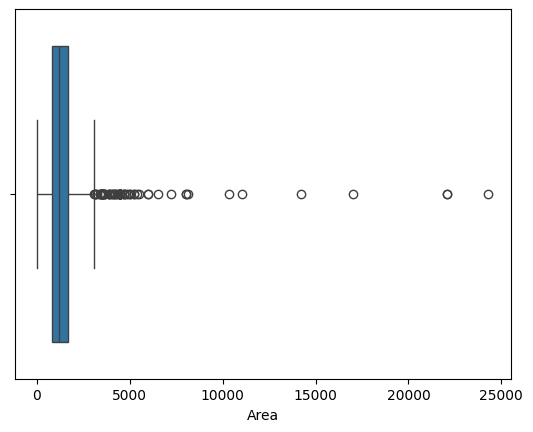

In [ ]:
sns.boxplot(data, x='Area')

<Axes: xlabel='Area', ylabel='Count'>

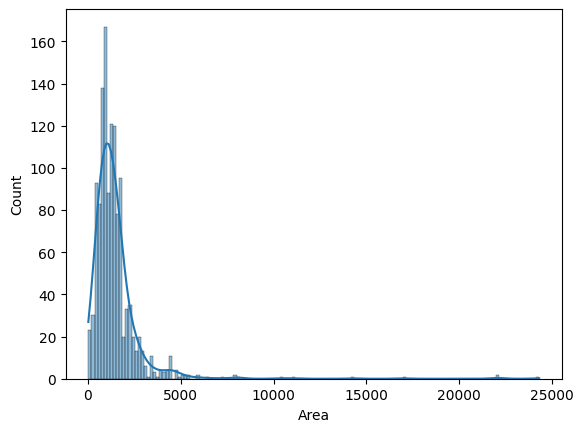

In [ ]:
sns.histplot(data, x='Area', kde=True)

In [ ]:
data[data['Area']>10000]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
234,22050.0,4,4.0,Semi-Furnished,Greater Kailash 1,2.0,51000000,Almost_ready,New_Property,Builder_Floor,30556.0
248,10350.0,4,7.0,Semi-Furnished,"Maharani Bagh, New Friends Colony",3.0,160000000,Ready_to_move,New_Property,Apartment,15459.0
504,22050.0,4,4.0,Semi-Furnished,Greater Kailash 1,2.0,51000000,Almost_ready,New_Property,Builder_Floor,30556.0
567,24300.0,4,5.0,Semi-Furnished,Saket,2.0,51000000,Ready_to_move,Resale,Builder_Floor,12500.0
626,14220.0,3,3.0,Semi-Furnished,Paschim Vihar Block B4,1.0,27500000,Ready_to_move,New_Property,Builder_Floor,10943.0
1133,17010.0,3,3.0,Semi-Furnished,Punjabi Bagh West,2.0,25000000,Ready_to_move,Resale,Builder_Floor,15278.0
1258,11050.0,3,3.0,Unfurnished,Chittaranjan Park,1.0,18500000,Ready_to_move,New_Property,Builder_Floor,12916.0


Most of the houses with Area gt 10k sqft has pricesless than 100M

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop(['Price'], axis = 1)
y = data['Price']

In [ ]:
x

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,Ready_to_move,New_Property,Builder_Floor,15690.136542
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,Ready_to_move,New_Property,Apartment,6667.000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,Ready_to_move,Resale,Apartment,6667.000000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,Ready_to_move,Resale,Builder_Floor,6667.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,Ready_to_move,New_Property,Builder_Floor,6667.000000
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,Ready_to_move,New_Property,Builder_Floor,12916.000000
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,Ready_to_move,Resale,Builder_Floor,12916.000000
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,Ready_to_move,New_Property,Builder_Floor,12916.000000
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,Ready_to_move,Resale,Builder_Floor,12916.000000


In [ ]:
y

0        6500000
1        5000000
2       15500000
3        4200000
4        6200000
          ...   
1254    55000000
1255    12500000
1256    17500000
1257    11500000
1258    18500000
Name: Price, Length: 1259, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [ ]:
train_data = x_train.join(y_train)

In [ ]:
train_data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
120,1500.0,1,2.556086,Unfurnished,Lajpat Nagar 2,1.935563,Ready_to_move,Resale,Apartment,15690.136542,13500000
914,100.0,3,2.000000,Semi-Furnished,Malviya Nagar,1.000000,Ready_to_move,Resale,Builder_Floor,14888.000000,17000000
849,855.0,3,2.000000,Unfurnished,Mahavir Enclave Part 1,1.000000,Ready_to_move,Resale,Apartment,15690.136542,4800000
199,1295.0,3,2.000000,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.000000,Ready_to_move,New_Property,Apartment,6875.000000,10000000
587,972.0,2,2.000000,Semi-Furnished,Safdarjung Enclave,1.000000,Ready_to_move,Resale,Apartment,14818.000000,17000000
...,...,...,...,...,...,...,...,...,...,...,...
1044,1200.0,3,2.000000,Semi-Furnished,Karol Bagh,1.000000,Ready_to_move,Resale,Builder_Floor,7290.000000,14500000
516,450.0,2,1.000000,Unfurnished,"Seelampur, Shahdara",1.935563,Ready_to_move,Resale,Apartment,13333.000000,6000000
38,1350.0,3,4.000000,Unfurnished,Lajpat Nagar,1.000000,Ready_to_move,Resale,Apartment,15690.136542,25000000
1169,500.0,2,2.000000,Semi-Furnished,"Govindpuri Extension, Kalkaji",1.000000,Ready_to_move,New_Property,Builder_Floor,15690.136542,3300000


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'BHK'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Parking'}>],
       [<Axes: title={'center': 'Per_Sqft'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

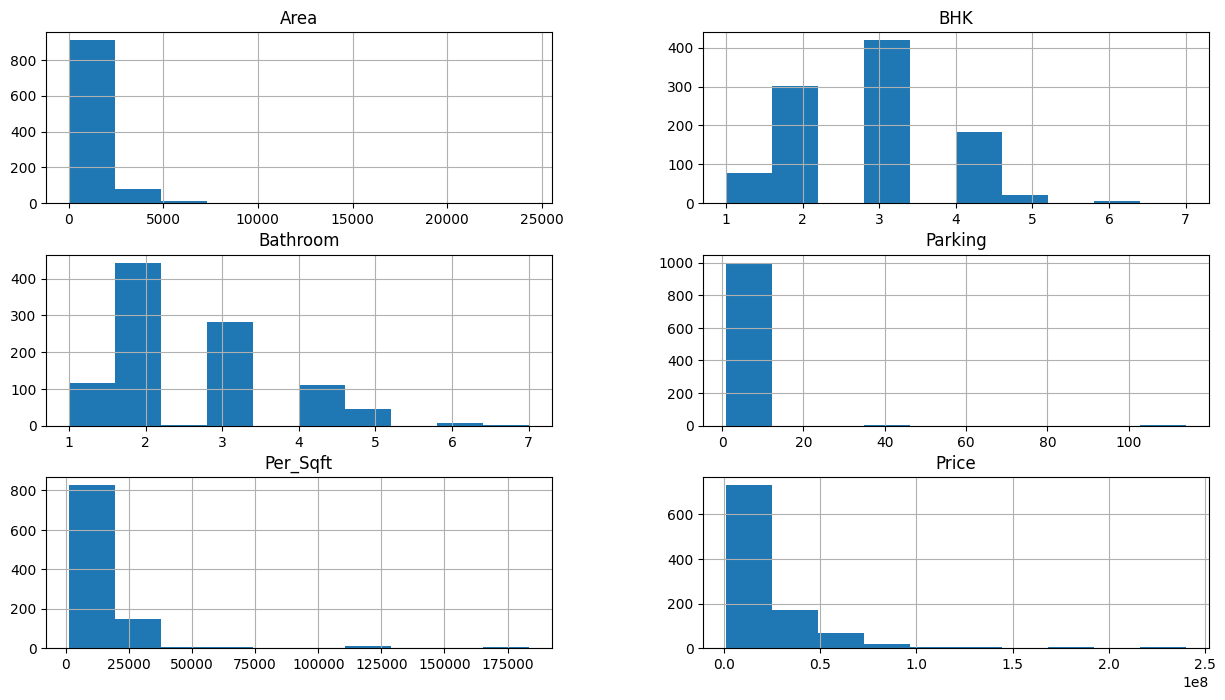

In [ ]:
train_data.hist(figsize = (15, 8))

In [ ]:
train_data.corr()

<ipython-input-29-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,Area,BHK,Bathroom,Parking,Per_Sqft,Price
Area,1.000000,0.458396,0.536397,-0.004590,0.178450,0.579750
BHK,0.458396,1.000000,0.790393,-0.065946,0.169083,0.573575
Bathroom,0.536397,0.790393,1.000000,-0.027115,0.226679,0.721816
Parking,-0.004590,-0.065946,-0.027115,1.000000,0.004452,0.001356
Per_Sqft,0.178450,0.169083,0.226679,0.004452,1.000000,0.334161
Price,0.579750,0.573575,0.721816,0.001356,0.334161,1.000000


<ipython-input-30-c1bf0ed2b00b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')


<Axes: >

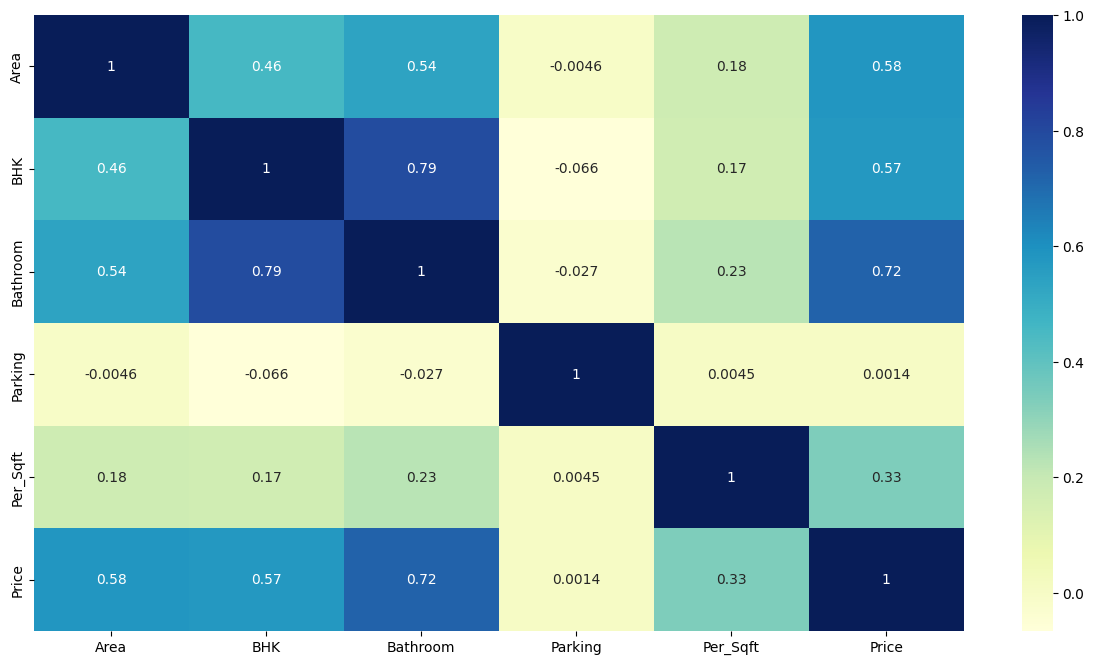

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [ ]:
train_data.Furnishing.value_counts()

Semi-Furnished    576
Unfurnished       298
Furnished         133
Name: Furnishing, dtype: int64

In [ ]:
train_data.Locality.value_counts()

Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                            28
Lajpat Nagar 2                                                                                                                                                                                                                                                                                                                            27
J R Designers Floors, Rohini Sector 24                                                                                                                                                                                                                                                                                                    27
K

In [ ]:
train_data.Status.value_counts()

Ready_to_move    950
Almost_ready      57
Name: Status, dtype: int64

In [ ]:
train_data.Transaction.value_counts()

Resale          621
New_Property    386
Name: Transaction, dtype: int64

In [ ]:
train_data.Type.value_counts()

Builder_Floor    539
Apartment        468
Name: Type, dtype: int64

In [ ]:
train_data['Area'] = np.log(train_data['Area'] + 1)
train_data['Parking'] = np.log(train_data['Parking'] + 1)
train_data['Per_Sqft'] = np.log(train_data['Per_Sqft'] + 1)

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'BHK'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Parking'}>],
       [<Axes: title={'center': 'Per_Sqft'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

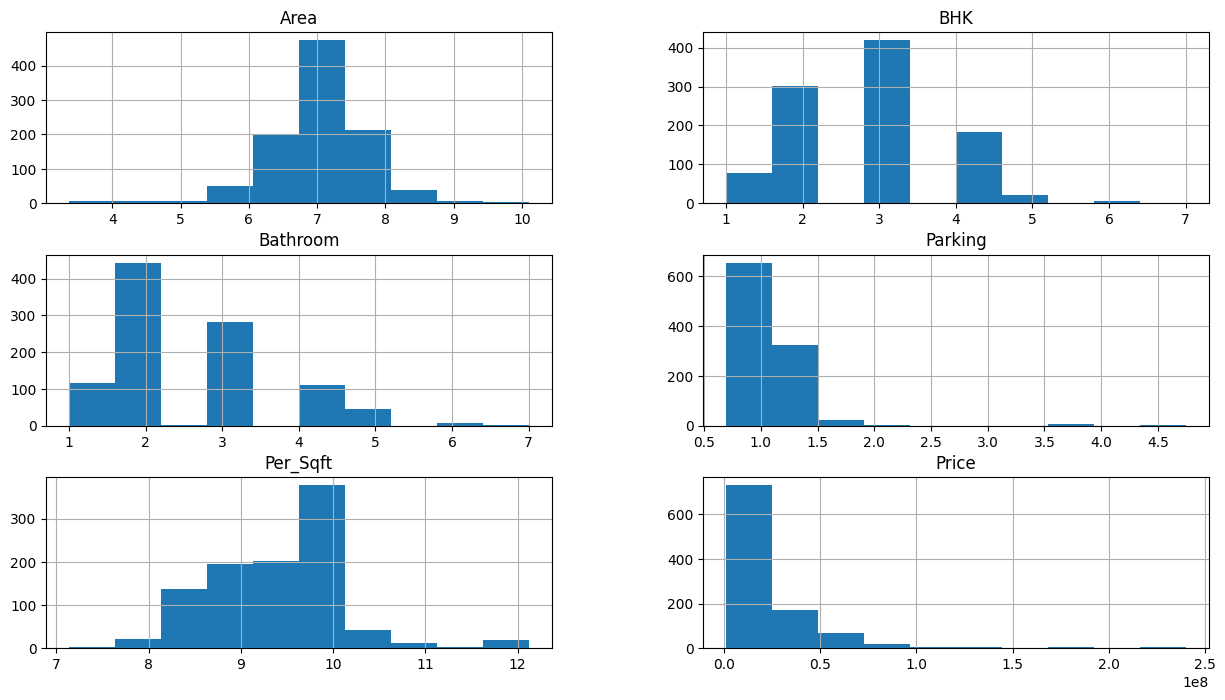

In [ ]:
train_data.hist(figsize = (15, 8))

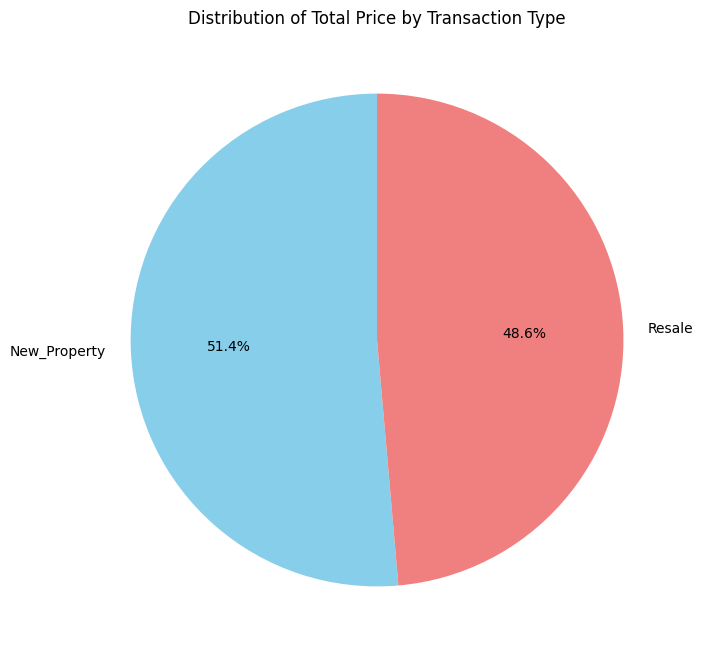

In [ ]:
total_price_by_transaction = train_data.groupby('Transaction')['Price'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(total_price_by_transaction['Price'], labels=total_price_by_transaction['Transaction'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Total Price by Transaction Type')
plt.show()

<ipython-input-39-fe5f33fe0bf9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Furnishing', y='Price', data=average_price_by_furnishing, palette='viridis')


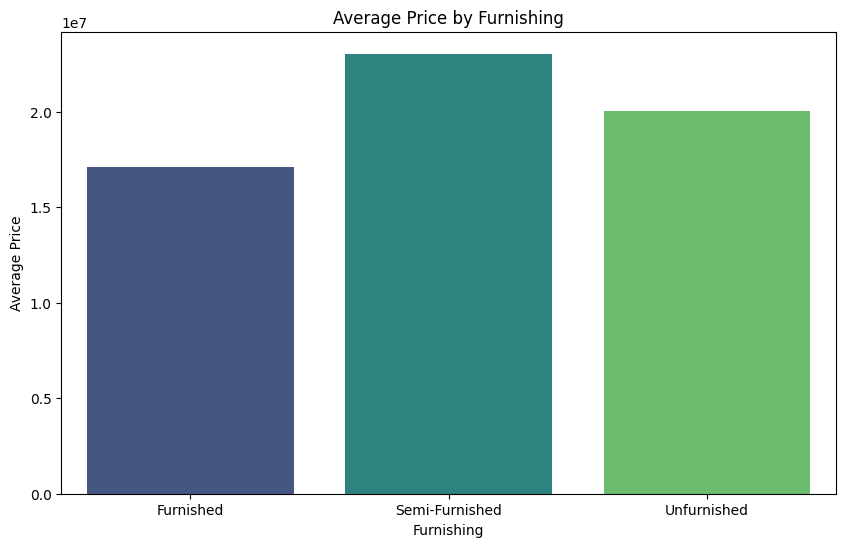

In [ ]:
average_price_by_furnishing = train_data.groupby('Furnishing')['Price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Furnishing', y='Price', data=average_price_by_furnishing, palette='viridis')
plt.xlabel('Furnishing')
plt.ylabel('Average Price')
plt.title('Average Price by Furnishing')
plt.show()

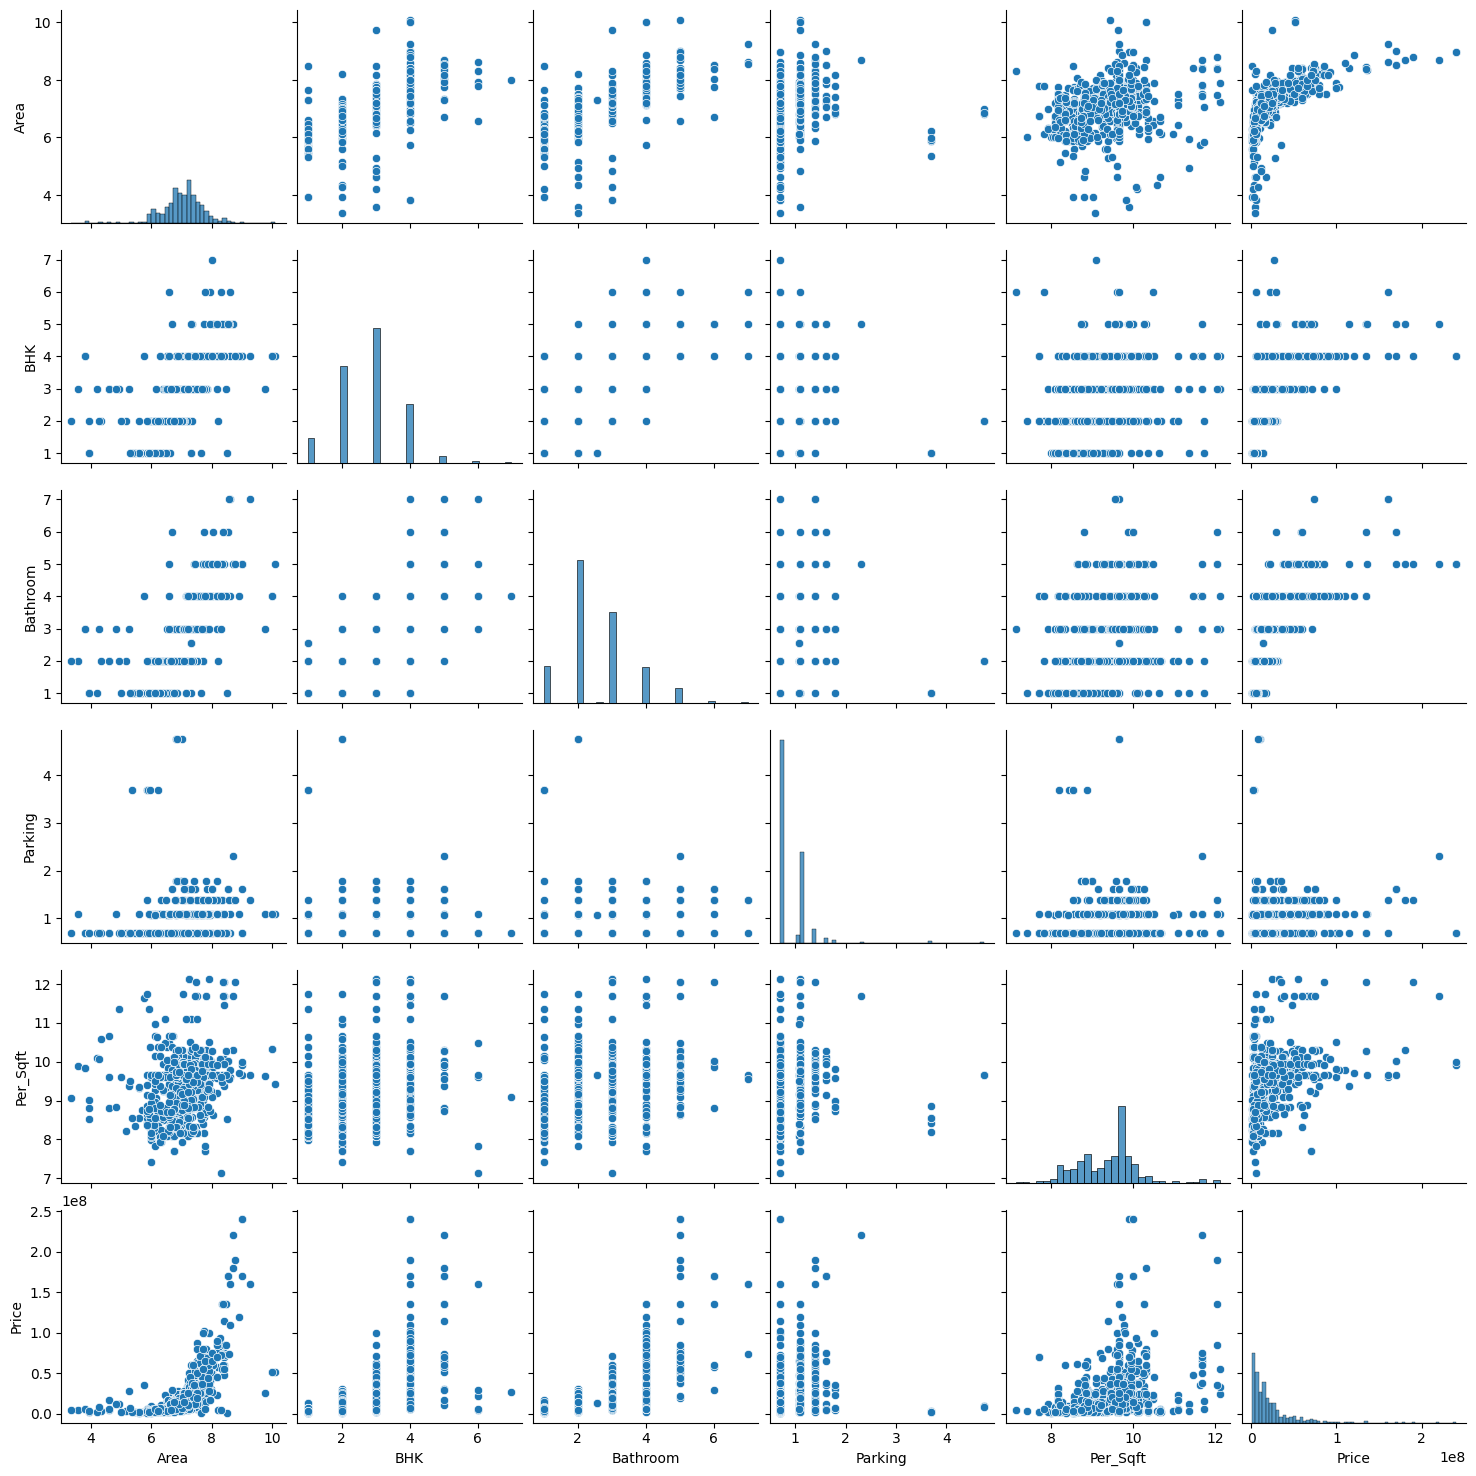

In [ ]:
sns.pairplot(train_data)

In [ ]:
train_data.corr()

<ipython-input-41-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,Area,BHK,Bathroom,Parking,Per_Sqft,Price
Area,1.000000,0.666241,0.711885,0.160210,0.268515,0.648375
BHK,0.666241,1.000000,0.790393,0.075886,0.238520,0.573575
Bathroom,0.711885,0.790393,1.000000,0.178062,0.314777,0.721816
Parking,0.160210,0.075886,0.178062,1.000000,0.159411,0.214531
Per_Sqft,0.268515,0.238520,0.314777,0.159411,1.000000,0.403048
Price,0.648375,0.573575,0.721816,0.214531,0.403048,1.000000


<ipython-input-42-c1bf0ed2b00b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')


<Axes: >

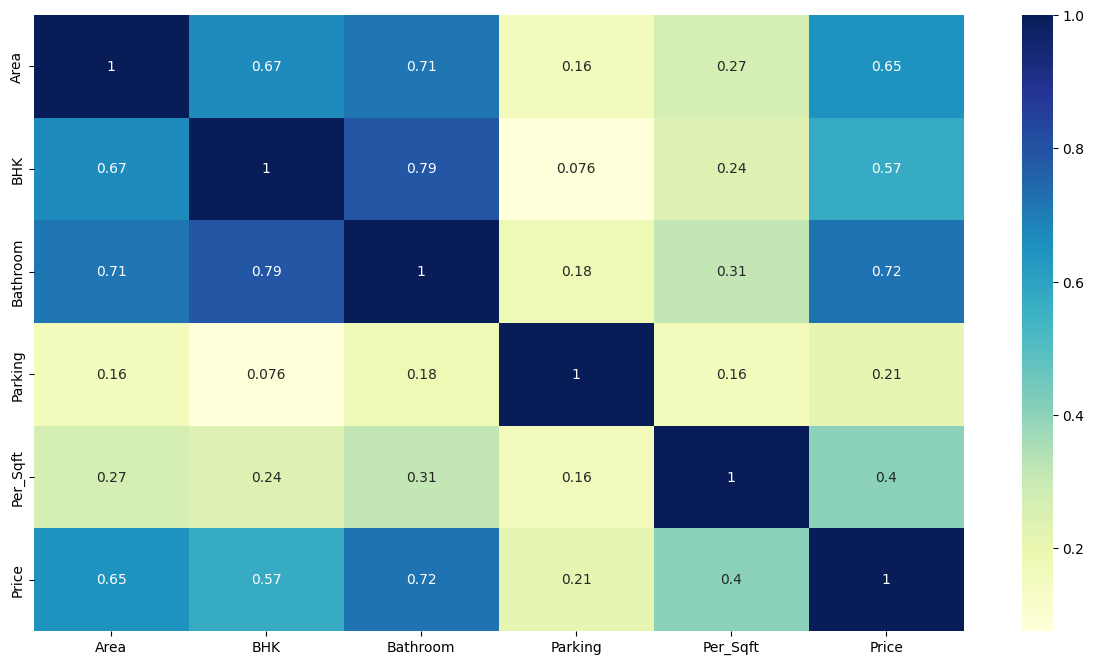

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

In [ ]:
train_data1 = train_data.join(pd.get_dummies(train_data.Furnishing)).drop(['Furnishing'], axis = 1)
train_data1


,Area,BHK,Bathroom,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price,Furnished,Semi-Furnished,Unfurnished
120,7.313887,1,2.556086,Lajpat Nagar 2,1.076899,Ready_to_move,Resale,Apartment,9.660851,13500000,0,0,1
914,4.615121,3,2.000000,Malviya Nagar,0.693147,Ready_to_move,Resale,Builder_Floor,9.608378,17000000,0,1,0
849,6.752270,3,2.000000,Mahavir Enclave Part 1,0.693147,Ready_to_move,Resale,Apartment,9.660851,4800000,0,0,1
199,7.167038,3,2.000000,"J R Designers Floors, Rohini Sector 24",0.693147,Ready_to_move,New_Property,Apartment,8.835792,10000000,0,1,0
587,6.880384,2,2.000000,Safdarjung Enclave,0.693147,Ready_to_move,Resale,Apartment,9.603665,17000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,7.090910,3,2.000000,Karol Bagh,0.693147,Ready_to_move,Resale,Builder_Floor,8.894396,14500000,0,1,0
516,6.111467,2,1.000000,"Seelampur, Shahdara",1.076899,Ready_to_move,Resale,Apartment,9.498072,6000000,0,0,1
38,7.208600,3,4.000000,Lajpat Nagar,0.693147,Ready_to_move,Resale,Apartment,9.660851,25000000,0,0,1
1169,6.216606,2,2.000000,"Govindpuri Extension, Kalkaji",0.693147,Ready_to_move,New_Property,Builder_Floor,9.660851,3300000,0,1,0


In [ ]:
train_data2 = train_data1.join(pd.get_dummies(train_data.Status)).drop(["Status"], axis = 1)
train_data2

,Area,BHK,Bathroom,Locality,Parking,Transaction,Type,Per_Sqft,Price,Furnished,Semi-Furnished,Unfurnished,Almost_ready,Ready_to_move
120,7.313887,1,2.556086,Lajpat Nagar 2,1.076899,Resale,Apartment,9.660851,13500000,0,0,1,0,1
914,4.615121,3,2.000000,Malviya Nagar,0.693147,Resale,Builder_Floor,9.608378,17000000,0,1,0,0,1
849,6.752270,3,2.000000,Mahavir Enclave Part 1,0.693147,Resale,Apartment,9.660851,4800000,0,0,1,0,1
199,7.167038,3,2.000000,"J R Designers Floors, Rohini Sector 24",0.693147,New_Property,Apartment,8.835792,10000000,0,1,0,0,1
587,6.880384,2,2.000000,Safdarjung Enclave,0.693147,Resale,Apartment,9.603665,17000000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,7.090910,3,2.000000,Karol Bagh,0.693147,Resale,Builder_Floor,8.894396,14500000,0,1,0,0,1
516,6.111467,2,1.000000,"Seelampur, Shahdara",1.076899,Resale,Apartment,9.498072,6000000,0,0,1,0,1
38,7.208600,3,4.000000,Lajpat Nagar,0.693147,Resale,Apartment,9.660851,25000000,0,0,1,0,1
1169,6.216606,2,2.000000,"Govindpuri Extension, Kalkaji",0.693147,New_Property,Builder_Floor,9.660851,3300000,0,1,0,0,1


In [ ]:
train_data3 = train_data2.join(pd.get_dummies(train_data.Transaction)).drop(["Transaction"], axis = 1)
train_data3

,Area,BHK,Bathroom,Locality,Parking,Type,Per_Sqft,Price,Furnished,Semi-Furnished,Unfurnished,Almost_ready,Ready_to_move,New_Property,Resale
120,7.313887,1,2.556086,Lajpat Nagar 2,1.076899,Apartment,9.660851,13500000,0,0,1,0,1,0,1
914,4.615121,3,2.000000,Malviya Nagar,0.693147,Builder_Floor,9.608378,17000000,0,1,0,0,1,0,1
849,6.752270,3,2.000000,Mahavir Enclave Part 1,0.693147,Apartment,9.660851,4800000,0,0,1,0,1,0,1
199,7.167038,3,2.000000,"J R Designers Floors, Rohini Sector 24",0.693147,Apartment,8.835792,10000000,0,1,0,0,1,1,0
587,6.880384,2,2.000000,Safdarjung Enclave,0.693147,Apartment,9.603665,17000000,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,7.090910,3,2.000000,Karol Bagh,0.693147,Builder_Floor,8.894396,14500000,0,1,0,0,1,0,1
516,6.111467,2,1.000000,"Seelampur, Shahdara",1.076899,Apartment,9.498072,6000000,0,0,1,0,1,0,1
38,7.208600,3,4.000000,Lajpat Nagar,0.693147,Apartment,9.660851,25000000,0,0,1,0,1,0,1
1169,6.216606,2,2.000000,"Govindpuri Extension, Kalkaji",0.693147,Builder_Floor,9.660851,3300000,0,1,0,0,1,1,0


In [ ]:
train_data4 = train_data3.join(pd.get_dummies(train_data.Type)).drop(["Type"], axis = 1)
train_data4

,Area,BHK,Bathroom,Locality,Parking,Per_Sqft,Price,Furnished,Semi-Furnished,Unfurnished,Almost_ready,Ready_to_move,New_Property,Resale,Apartment,Builder_Floor
120,7.313887,1,2.556086,Lajpat Nagar 2,1.076899,9.660851,13500000,0,0,1,0,1,0,1,1,0
914,4.615121,3,2.000000,Malviya Nagar,0.693147,9.608378,17000000,0,1,0,0,1,0,1,0,1
849,6.752270,3,2.000000,Mahavir Enclave Part 1,0.693147,9.660851,4800000,0,0,1,0,1,0,1,1,0
199,7.167038,3,2.000000,"J R Designers Floors, Rohini Sector 24",0.693147,8.835792,10000000,0,1,0,0,1,1,0,1,0
587,6.880384,2,2.000000,Safdarjung Enclave,0.693147,9.603665,17000000,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,7.090910,3,2.000000,Karol Bagh,0.693147,8.894396,14500000,0,1,0,0,1,0,1,0,1
516,6.111467,2,1.000000,"Seelampur, Shahdara",1.076899,9.498072,6000000,0,0,1,0,1,0,1,1,0
38,7.208600,3,4.000000,Lajpat Nagar,0.693147,9.660851,25000000,0,0,1,0,1,0,1,1,0
1169,6.216606,2,2.000000,"Govindpuri Extension, Kalkaji",0.693147,9.660851,3300000,0,1,0,0,1,1,0,0,1


In [ ]:
train_data_ready = train_data4.drop(["Locality"], axis = 1)
train_data_ready

,Area,BHK,Bathroom,Parking,Per_Sqft,Price,Furnished,Semi-Furnished,Unfurnished,Almost_ready,Ready_to_move,New_Property,Resale,Apartment,Builder_Floor
120,7.313887,1,2.556086,1.076899,9.660851,13500000,0,0,1,0,1,0,1,1,0
914,4.615121,3,2.000000,0.693147,9.608378,17000000,0,1,0,0,1,0,1,0,1
849,6.752270,3,2.000000,0.693147,9.660851,4800000,0,0,1,0,1,0,1,1,0
199,7.167038,3,2.000000,0.693147,8.835792,10000000,0,1,0,0,1,1,0,1,0
587,6.880384,2,2.000000,0.693147,9.603665,17000000,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,7.090910,3,2.000000,0.693147,8.894396,14500000,0,1,0,0,1,0,1,0,1
516,6.111467,2,1.000000,1.076899,9.498072,6000000,0,0,1,0,1,0,1,1,0
38,7.208600,3,4.000000,0.693147,9.660851,25000000,0,0,1,0,1,0,1,1,0
1169,6.216606,2,2.000000,0.693147,9.660851,3300000,0,1,0,0,1,1,0,0,1


<Axes: >

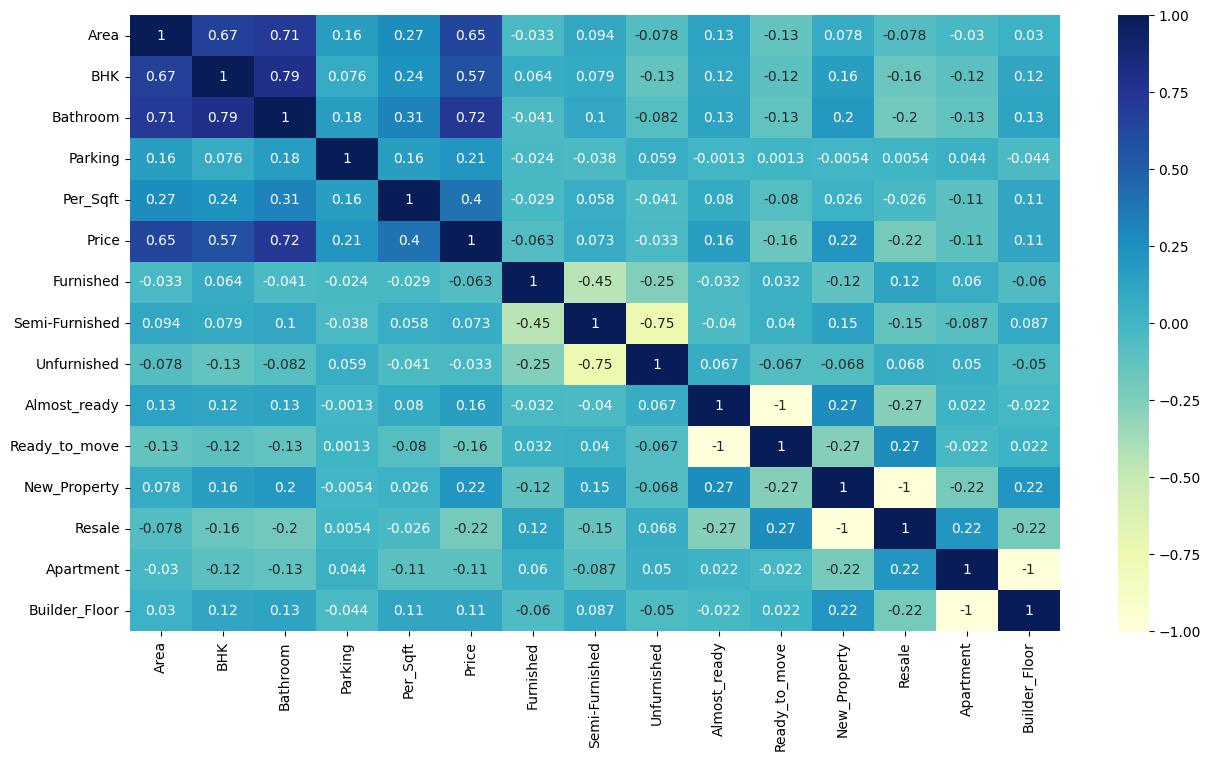

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data_ready.corr(), annot = True, cmap = 'YlGnBu')

<Axes: xlabel='Area', ylabel='BHK'>

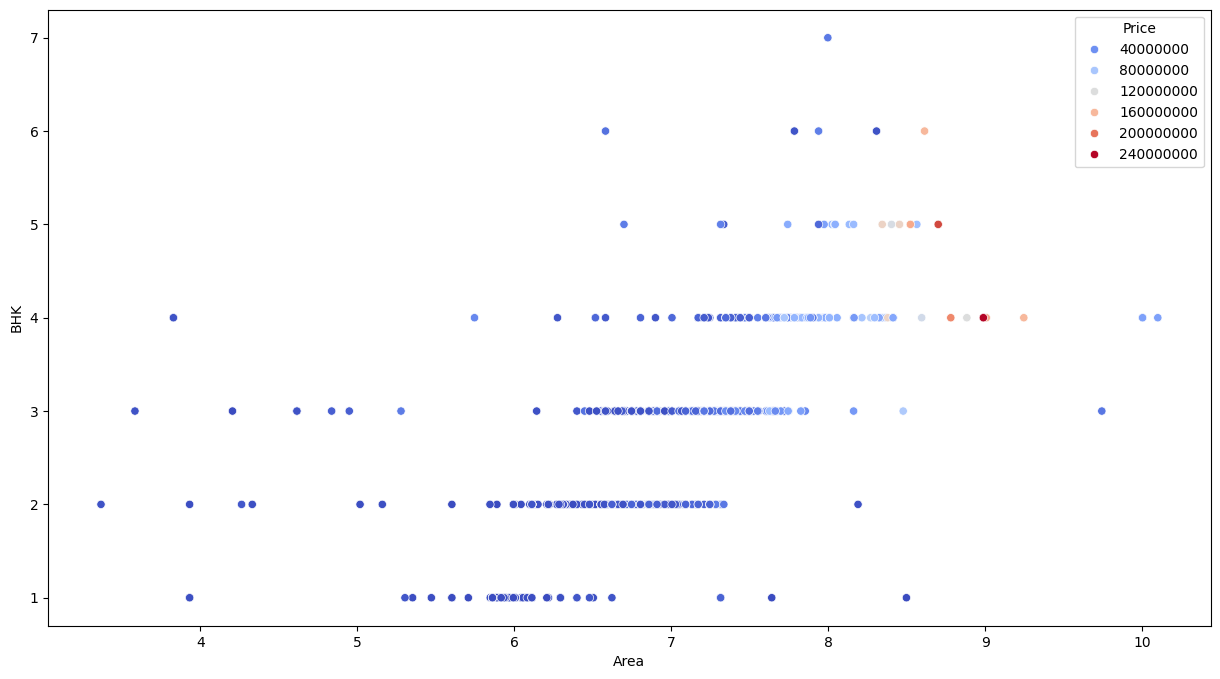

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'Area', y = 'BHK', data =train_data_ready, hue = 'Price', palette = 'coolwarm')

In [ ]:
train_data_ready['BHK Ration'] = train_data_ready['BHK'] / train_data_ready['Area']
train_data_ready['Bathroom Ratio'] = train_data_ready['Bathroom'] / train_data_ready['BHK']

<Axes: >

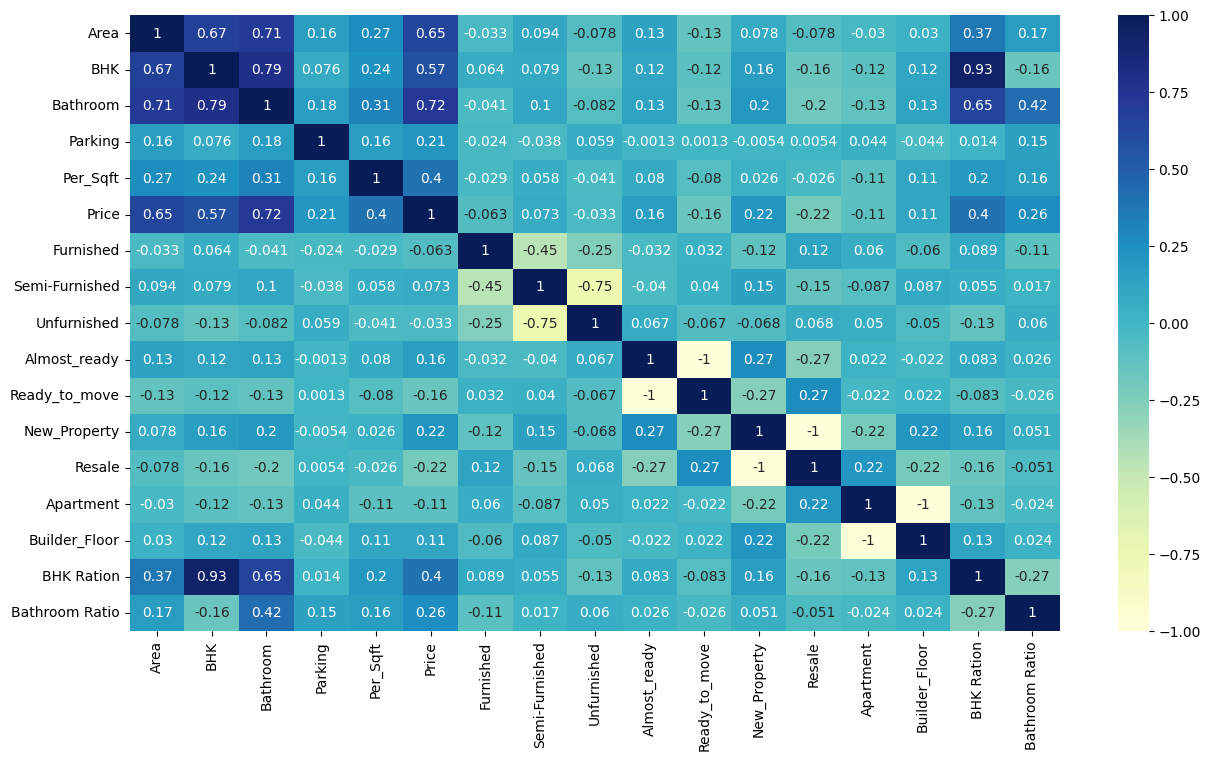

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data_ready.corr(), annot = True, cmap = 'YlGnBu')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train, y_train = train_data_ready.drop(["Price"], axis = 1), train_data_ready['Price']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [ ]:
test_data = x_test.join(y_test)
test_data['Area'] = np.log(test_data['Area'] + 1)
test_data['Parking'] = np.log(test_data['Parking'] + 1)
test_data['Per_Sqft'] = np.log(test_data['Per_Sqft'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.Furnishing)).drop(['Furnishing'], axis = 1)

test_data = test_data.join(pd.get_dummies(test_data.Status)).drop(["Status"], axis = 1)

test_data = test_data.join(pd.get_dummies(test_data.Transaction)).drop(["Transaction"], axis = 1)

test_data = test_data.join(pd.get_dummies(test_data.Type)).drop(["Type"], axis = 1)

test_data = test_data.drop(["Locality"], axis = 1)


test_data['BHK Ration'] = test_data['BHK'] / test_data['Area']
test_data['Bathroom Ratio'] = test_data['Bathroom'] / test_data['BHK']

x_test, y_test = test_data.drop(["Price"], axis = 1), test_data['Price']

In [ ]:
x_test_s = scaler.transform(x_test)

In [ ]:
reg.score(x_test_s, y_test)

0.6896221725524629

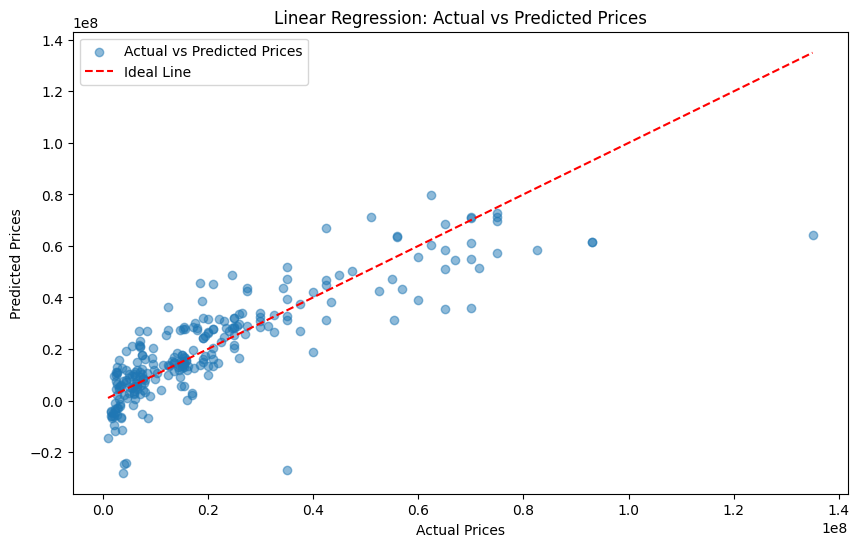

In [ ]:
x_test_s = scaler.transform(x_test)
y_pred = reg.predict(x_test_s)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test, y_test)

0.8731886246619321

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [30, 50, 100],
    "max_features": [6, 8, 12],
    "min_samples_split": [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [6, 8, 12],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_features=6)

In [ ]:
best_forest.score(x_test, y_test)

0.8910023153552954